In [275]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('wordnet')
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel
import ast 
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Using TensorFlow backend.


In [36]:
data1 = pd.read_csv("clean_data_v2.csv")
data1.dropna()
data1.head()

,Unnamed: 0,Title,Cleaned_Plot
0,0,The Day of the Pelican,story fictional family family living midst war...
1,1,The Lost World of British Communism,book composed series collected together mark t...
2,2,Village of Secrets,book narrative regarding role village sur east...
3,3,Gods Without Men,although many geographically temporally action...
4,4,The Women of the Cousins' War,book introduction three biographical first wri...


In [37]:
data1['Cleaned_Plot'] = data1['Cleaned_Plot'].astype(str)

In [25]:
genre = pd.read_csv("book_genre.csv")

In [51]:
result = genre.join(data1.set_index('Title'), on='Title')

In [ ]:
result.dropna()
result.head()

In [ ]:
#data1['Cleaned_Plot'] = data1.fillna({'Cleaned_Plot':''})
#data1['Cleaned_Plot'] = data1['Cleaned_Plot'].str.replace('\d+', '')

In [256]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_df = 0.5, max_features = 10000)
processed_features = vectorizer.fit_transform(result['Cleaned_Plot']).toarray()

In [257]:
len(processed_features[1])

10000

In [79]:
y = result[['fantasy','science','horror','thriller','mystery','detective','history','young','children']]

In [ ]:
yy = y.idxmax(1)
replace_map = {'result':{'fantasy':1,'science':2,'horror':3,'thriller':4,
                        'mystery':5,'detective':6,'history':7,'young':8,'childern':9}}
y['result'] = yy
y.replace(replace_map, inplace=True)

In [156]:
Y = y['result']

In [163]:
Y = Y.tolist()

In [258]:
#processed_features[1]
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(processed_features,Y ,train_size = 0.7)

In [259]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train1)

# Apply transform to both the training set and the test set.
X_train2 = scaler.transform(X_train1)
X_test2 = scaler.transform(X_test1)

In [238]:
len(X_train[1])

1000

In [260]:
# Without PCA

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_train2, Y_train1)

score = logisticRegr.score(X_test2, Y_test1)
print(score)

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5612338858195212


In [264]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000)
pca.fit(X_train1)

X_train = pca.transform(X_train1)
X_test = pca.transform(X_test1)

In [277]:
S = []

for i in range(19):
    n = 200 + i*200
    pca = PCA(n_components=n)
    pca.fit(X_train1)

    X_train = pca.transform(X_train1)
    X_test = pca.transform(X_test1)
    logisticRegr = LogisticRegression(max_iter=1000)
    logisticRegr.fit(X_train, Y_train1)

    score = logisticRegr.score(X_test, Y_test1)
    S.append(score)
    

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logisti

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [278]:
S

[0.6091160220994475,
 0.6220073664825047,
 0.6174033149171271,
 0.6210865561694291,
 0.6224677716390423,
 0.6252302025782689,
 0.6261510128913443,
 0.6307550644567219,
 0.6302946593001841,
 0.6312154696132597,
 0.6325966850828729,
 0.6312154696132597,
 0.6312154696132597,
 0.6289134438305709,
 0.6312154696132597,
 0.6316758747697975,
 0.6330570902394107,
 0.6321362799263351,
 0.6312154696132597]

In [283]:
a_list = list(range(19)) 
X_ = [200+element * 200 for element in a_list]

Text(0, 0.5, 'Logistic Classification Accuracy')

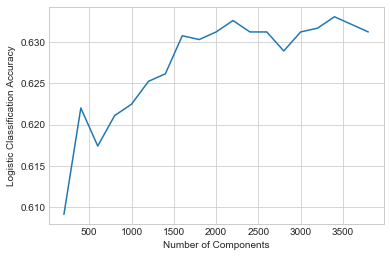

In [288]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.plot(X_,S)
plt.xlabel("Number of Components")
plt.ylabel("Logistic Classification Accuracy")